<a href="https://colab.research.google.com/github/vthamada/TelecomX_parte2/blob/main/TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠️ Preparação dos Dados

## Extração do Arquivo Tratado

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/vthamada/TelecomX_parte2/refs/heads/main/dados_tratados.csv')

In [ ]:
dados.head()

,customerID,evadiu,genero,idoso,tem_parceiro,tem_dependentes,tempo_meses,servico_telefone,multiplas_linhas,tipo_internet,...,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,forma_pagamento,conta_mensal,conta_total,conta_diaria,tem_internet,qtd_servicos
0,0002-ORFBO,0,feminino,0,1,1,9,1,0,dsl,...,1,0,anual,1,boleto,65.6,593.30,2.19,1,5
1,0003-MKNFE,0,masculino,0,0,0,9,1,1,dsl,...,0,1,mensal,0,boleto,59.9,542.40,2.00,1,4
2,0004-TLHLJ,1,masculino,0,0,0,4,1,0,fibra óptica,...,0,0,mensal,1,débito online,73.9,280.85,2.46,1,3
3,0011-IGKFF,1,masculino,1,1,0,13,1,0,fibra óptica,...,1,1,mensal,1,débito online,98.0,1237.85,3.27,1,6
4,0013-EXCHZ,1,feminino,1,1,0,3,1,0,fibra óptica,...,1,0,mensal,1,boleto,83.9,267.40,2.80,1,4


## Remoção de Colunas Irrelevantes

In [ ]:
dados.drop('customerID', axis=1, inplace=True)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   evadiu                7043 non-null   int64  
 1   genero                7043 non-null   object 
 2   idoso                 7043 non-null   int64  
 3   tem_parceiro          7043 non-null   int64  
 4   tem_dependentes       7043 non-null   int64  
 5   tempo_meses           7043 non-null   int64  
 6   servico_telefone      7043 non-null   int64  
 7   multiplas_linhas      7043 non-null   int64  
 8   tipo_internet         7043 non-null   object 
 9   seguranca_online      7043 non-null   int64  
 10  backup_online         7043 non-null   int64  
 11  protecao_dispositivo  7043 non-null   int64  
 12  suporte_tecnico       7043 non-null   int64  
 13  tv_streaming          7043 non-null   int64  
 14  filmes_streaming      7043 non-null   int64  
 15  tipo_contrato        

## Verificação da Proporção de Evasão

In [ ]:
dados['evadiu'].value_counts(normalize=True)

,proportion
evadiu,
0,0.73463
1,0.26537


# 🎯 Correlação e Seleção de Variáveis

## Feature Engineering

In [ ]:
import numpy as np

# 3. Possível upgrade recente
media_conta_mensal = dados['conta_mensal'].mean()
dados['possivel_upgrade_recente'] = ((dados['conta_mensal'] > media_conta_mensal) & (dados['tempo_meses'] < 6)).astype(int)

# 6. Contrato mensal (dummy)
dados['contrato_mensal'] = (dados['tipo_contrato'] == 'mensal').astype(int)

# 7. Serviços por real pago
dados['servico_por_real'] = dados['qtd_servicos'] / dados['conta_mensal'].replace(0, 1)

## Análise de Correlação

In [ ]:
corr = dados.corr(numeric_only=True)['evadiu'].sort_values(ascending=False)
print(corr)

evadiu                      1.000000
contrato_mensal             0.405103
possivel_upgrade_recente    0.322389
conta_diaria                0.193412
conta_mensal                0.193356
fatura_online               0.191825
idoso                       0.150889
tv_streaming                0.063228
filmes_streaming            0.061382
multiplas_linhas            0.040102
servico_telefone            0.011942
protecao_dispositivo       -0.066160
qtd_servicos               -0.067264
backup_online              -0.082255
tem_parceiro               -0.150448
tem_dependentes            -0.164221
suporte_tecnico            -0.164674
seguranca_online           -0.171226
conta_total                -0.198324
tempo_meses                -0.352229
servico_por_real           -0.404752
tem_internet                     NaN
Name: evadiu, dtype: float64


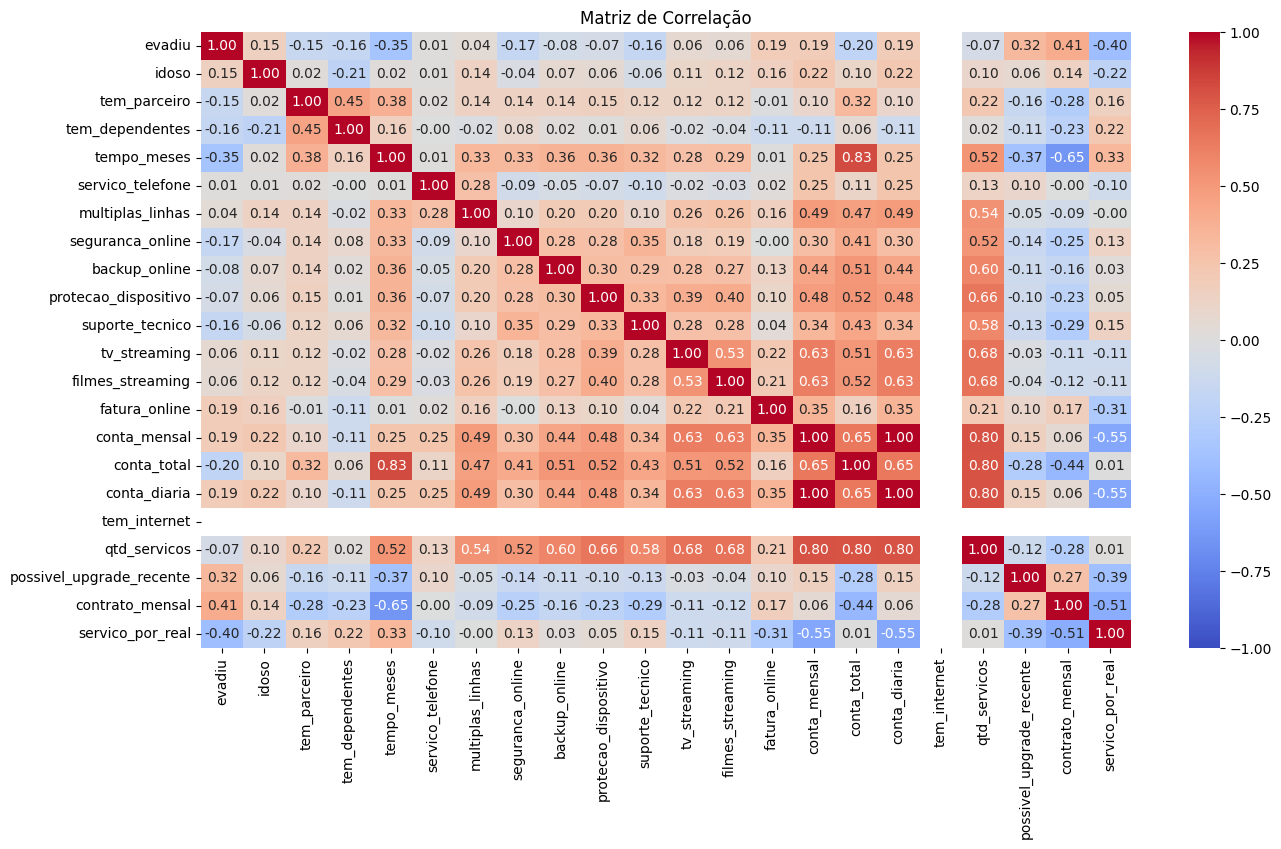

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação só para as colunas numéricas
corr_matrix = dados.corr(numeric_only=True)

# Gráfico de calor da matriz de correlação
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Variáveis com alta multicolinearidade:", high_corr)

Variáveis com alta multicolinearidade: ['conta_total', 'conta_diaria', 'qtd_servicos']


In [ ]:
features_remover = ['conta_diaria', 'qtd_servicos']
dados = dados.drop(features_remover, axis=1)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   evadiu                    7043 non-null   int64  
 1   genero                    7043 non-null   object 
 2   idoso                     7043 non-null   int64  
 3   tem_parceiro              7043 non-null   int64  
 4   tem_dependentes           7043 non-null   int64  
 5   tempo_meses               7043 non-null   int64  
 6   servico_telefone          7043 non-null   int64  
 7   multiplas_linhas          7043 non-null   int64  
 8   tipo_internet             7043 non-null   object 
 9   seguranca_online          7043 non-null   int64  
 10  backup_online             7043 non-null   int64  
 11  protecao_dispositivo      7043 non-null   int64  
 12  suporte_tecnico           7043 non-null   int64  
 13  tv_streaming              7043 non-null   int64  
 14  filmes_s

## Análises Direcionadas

In [ ]:
dados[['conta_mensal', 'conta_total', 'tempo_meses']].describe()

,conta_mensal,conta_total,tempo_meses
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,32.371149
std,30.090047,2266.794470,24.559481
min,18.250000,0.000000,0.000000
25%,35.500000,398.550000,9.000000
50%,70.350000,1394.550000,29.000000
75%,89.850000,3786.600000,55.000000
max,118.750000,8684.800000,72.000000


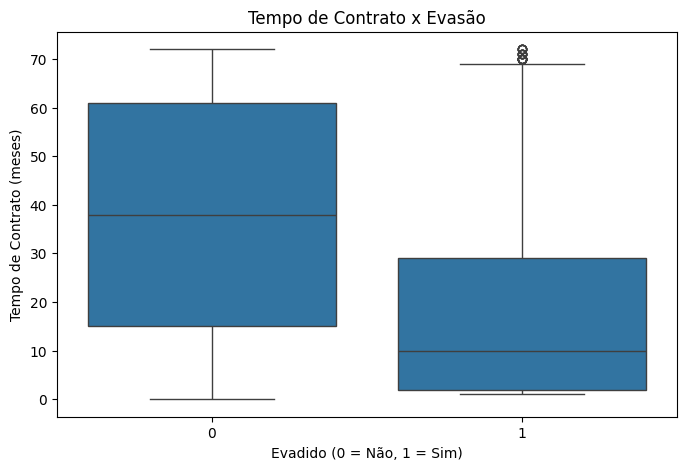

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='evadiu', y='tempo_meses', data=dados)
plt.title('Tempo de Contrato x Evasão')
plt.xlabel('Evadido (0 = Não, 1 = Sim)')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()

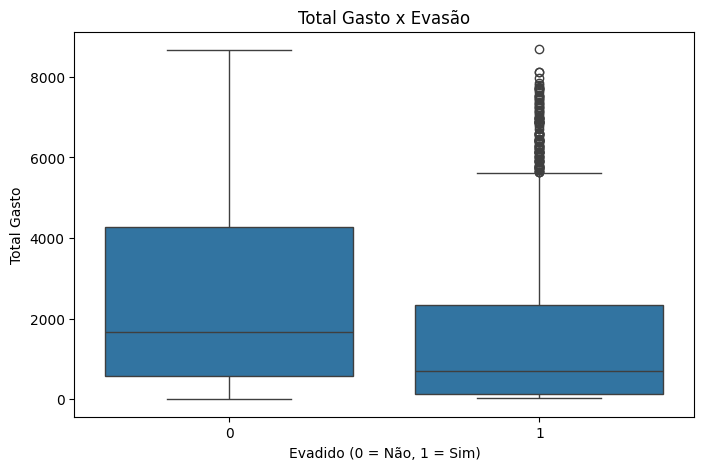

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='evadiu', y='conta_total', data=dados)
plt.title('Total Gasto x Evasão')
plt.xlabel('Evadido (0 = Não, 1 = Sim)')
plt.ylabel('Total Gasto')
plt.show()

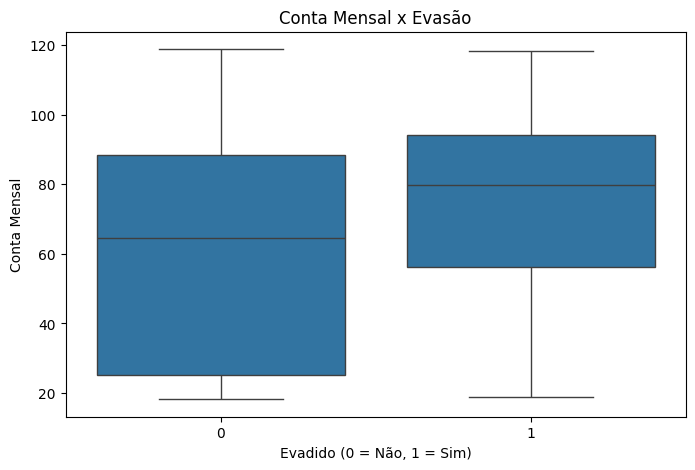

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='evadiu', y='conta_mensal', data=dados)
plt.title('Conta Mensal x Evasão')
plt.xlabel('Evadido (0 = Não, 1 = Sim)')
plt.ylabel('Conta Mensal')
plt.show()

# 💻 Encoding

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X = dados.drop('evadiu', axis=1)
y = dados['evadiu']

In [ ]:
colunas_categoricas = ['genero', 'tipo_internet', 'tipo_contrato', 'forma_pagamento']

In [ ]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='first'), colunas_categoricas),
    remainder='passthrough'
)

In [ ]:
X = one_hot.fit_transform(X)

colunas = one_hot.get_feature_names_out()

X = pd.DataFrame(X, columns=colunas, index=dados.index)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   onehotencoder__genero_masculino                            7043 non-null   float64
 1   onehotencoder__tipo_internet_fibra óptica                  7043 non-null   float64
 2   onehotencoder__tipo_internet_não                           7043 non-null   float64
 3   onehotencoder__tipo_contrato_bienal                        7043 non-null   float64
 4   onehotencoder__tipo_contrato_mensal                        7043 non-null   float64
 5   onehotencoder__forma_pagamento_cartão (automático)         7043 non-null   float64
 6   onehotencoder__forma_pagamento_débito online               7043 non-null   float64
 7   onehotencoder__forma_pagamento_transferência (automática)  7043 non-null   float64
 8   remainde

# 🤖 Modelagem Preditiva

## Separação de Dados

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
from collections import Counter
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

# Verificação do balanceamento
print("Distribuição original:", Counter(y_train))

Distribuição original: Counter({0: 3622, 1: 1308})


In [ ]:
smoteenn = SMOTEENN(random_state=42)
X_res_smoteenn, y_res_smoteenn = smoteenn.fit_resample(X_train, y_train)
print("Após SMOTEENN:", Counter(y_res_smoteenn))

Após SMOTEENN: Counter({1: 2187, 0: 1864})


In [ ]:
smote_tomek = SMOTETomek(random_state=42)
X_res_smtk, y_res_smtk = smote_tomek.fit_resample(X_train, y_train)
print("Após SMOTE + TomekLinks:", Counter(y_res_smtk))

Após SMOTE + TomekLinks: Counter({0: 3284, 1: 3284})


## Criação de Modelos

### Pipeline para Regressão Logística

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Criação do pipeline
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# Treinando o modelo
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(random_state=42))])

In [ ]:
y_pred_lr = pipeline_lr.predict(X_test)

### Pipeline para Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Criação do pipeline
pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])

# Treinando o modelo
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('rf', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred_rf = pipeline_rf.predict(X_test)

### Pipeline para XGBoost

In [ ]:
from xgboost import XGBClassifier

# Criação do pipeline
pipeline_xgb = Pipeline([
    ('xgb', XGBClassifier(random_state=42, eval_metric='logloss'))
])

# Treinando o modelo
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
y_pred_xgb = pipeline_xgb.predict(X_test)

## Avaliação dos Modelos

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Avaliação Regressão Logística

#### Avaliação de Treino

In [ ]:
y_train_pred_lr = pipeline_lr.predict(X_train)
print(classification_report(y_train, y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3622
           1       0.68      0.55      0.61      1308

    accuracy                           0.81      4930
   macro avg       0.76      0.73      0.74      4930
weighted avg       0.80      0.81      0.81      4930



#### Avaliação de Teste

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.65      0.53      0.58       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



#### Matriz de Confusão Regressão Logística

In [ ]:
print(confusion_matrix(y_test, y_pred_lr))

[[1390  162]
 [ 266  295]]


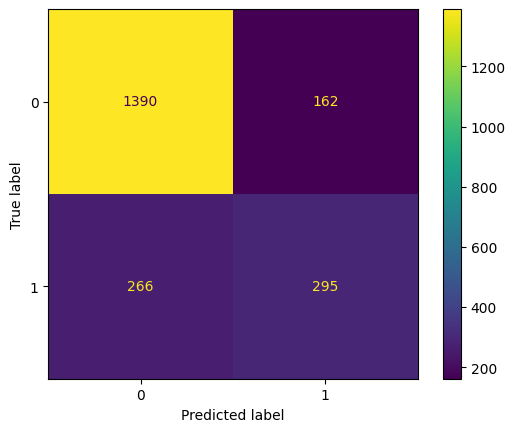

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()

### Avaliação Random Forest

#### Avaliação de Treino

In [ ]:
y_train_pred_rf = pipeline_rf.predict(X_train)
print(classification_report(y_train, y_train_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3622
           1       1.00      1.00      1.00      1308

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930



#### Avaliação de Teste

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.51      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



#### Matriz de Confusão Random Forest

In [ ]:
print(confusion_matrix(y_test, y_pred_rf))

[[1384  168]
 [ 277  284]]


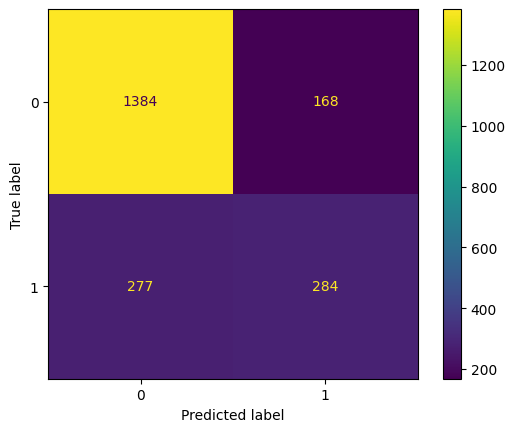

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()

### Avaliação XGBoost

#### Avaliação de Treino

In [ ]:
y_train_pred_xgb = pipeline_xgb.predict(X_train)
print(classification_report(y_train, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3622
           1       0.93      0.88      0.90      1308

    accuracy                           0.95      4930
   macro avg       0.94      0.93      0.94      4930
weighted avg       0.95      0.95      0.95      4930



#### Avaliação de Teste

In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1552
           1       0.60      0.52      0.56       561

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.77      0.78      0.77      2113



#### Matriz de Confusão XGBoost

In [ ]:
print(confusion_matrix(y_test, y_pred_xgb))

[[1353  199]
 [ 267  294]]


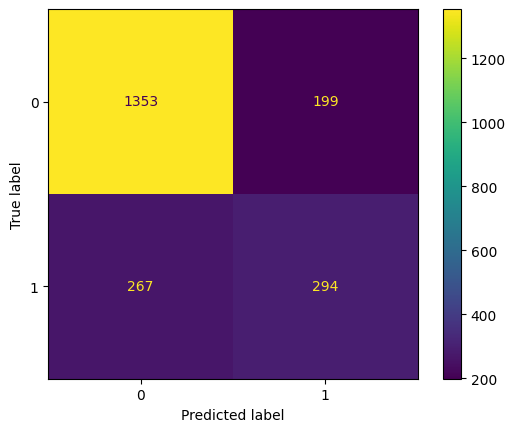

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot()

## Balanceamento e Ajuste de Hiperparâmetros

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import TomekLinks
from sklearn.feature_selection import SelectFromModel

### Modelo Regressão Logística

In [ ]:
# Pipeline com StandardScaler, SMOTEENN e Regressão Logística
pipeline_lr = Pipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('tomek', TomekLinks()),
    ('scaler', StandardScaler()),
    ('select', SelectFromModel(LogisticRegression(class_weight='balanced', solver='saga', max_iter=5000, random_state=42))),
    ('logreg', LogisticRegression(class_weight='balanced', solver='saga', max_iter=5000, random_state=42))
])

In [ ]:
# Grade de hiperparâmetros
param_grid_lr = {
    'select__threshold': ['mean', 'median', 0.01],
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l2', 'elasticnet'],
    'logreg__l1_ratio': [0.5, 0.7, 1],
    'logreg__max_iter': [100, 200, 300, 1000, 2000, 5000]
}

In [ ]:
# GridSearchCV com validação cruzada
grid_lr = GridSearchCV(
    pipeline_lr,
    param_grid_lr,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [ ]:
# Treinando com dados de treino
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smoteenn', SMOTEENN(random_state=42)),
                                       ('tomek', TomekLinks()),
                                       ('scaler', StandardScaler()),
                                       ('select',
                                        SelectFromModel(estimator=LogisticRegression(class_weight='balanced',
                                                                                     max_iter=5000,
                                                                                     random_state=42,
                                                                                     solver='saga'))),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=5000,
                                                           random_state=42,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__l1_ratio': [0.5, 0.7, 1],
                         'logreg__max_iter': [100, 200, 300, 1000, 2000, 5000],
                         'logreg__penalty': ['l2', 'elasticnet'],
                         'select__threshold': ['mean', 'median', 0.01]},
             scoring='f1', verbose=2)

In [ ]:
# Resultados
print("Melhores hiperparâmetros (LogReg):", grid_lr.best_params_)
print("Melhor score (f1):", grid_lr.best_score_)

Melhores hiperparâmetros (LogReg): {'logreg__C': 0.01, 'logreg__l1_ratio': 0.5, 'logreg__max_iter': 100, 'logreg__penalty': 'elasticnet', 'select__threshold': 0.01}
Melhor score (f1): 0.625594337573426


### Avaliação Regressão Logística pós balanceamento

In [ ]:
# Predição nos dados de treino
print(classification_report(y_train, grid_lr.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      3622
           1       0.52      0.80      0.63      1308

    accuracy                           0.75      4930
   macro avg       0.71      0.76      0.72      4930
weighted avg       0.81      0.75      0.76      4930



In [ ]:
# Predição nos dados de teste
y_pred_lr = grid_lr.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1552
           1       0.50      0.79      0.61       561

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.73      0.75      2113



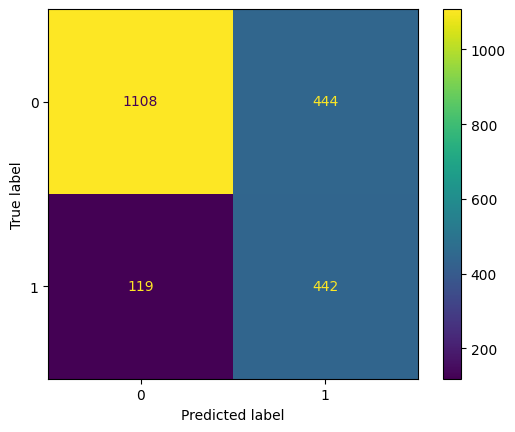

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()

### Modelo Random Forest

In [ ]:
# Pipeline com SMOTEENN, Tomek Links e Random Forest
pipeline_rf = Pipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('tomek', TomekLinks()),
    ('select', SelectFromModel(RandomForestClassifier(class_weight='balanced', random_state=42))),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

In [ ]:
# Grade de hiperparâmetros para ajuste
param_grid_rf = {
    'select__threshold': ['mean', 'median', 0.01],
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [3, 5, 10, 20, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# GridSearchCV com validação cruzada
grid_rf = GridSearchCV(
    pipeline_rf,
    param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [ ]:
# Treinando com dados de treino
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smoteenn', SMOTEENN(random_state=42)),
                                       ('tomek', TomekLinks()),
                                       ('select',
                                        SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',
                                                                                         random_state=42))),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [3, 5, 10, 20, None],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300],
                         'select__threshold': ['mean', 'median', 0.01]},
             scoring='f1', verbose=2)

In [ ]:
# Resultados
print("Melhores hiperparâmetros:", grid_rf.best_params_)
print("Melhor score (f1):", grid_rf.best_score_)

Melhores hiperparâmetros: {'rf__max_depth': 10, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 300, 'select__threshold': 'median'}
Melhor score (f1): 0.639551968015251


### Avaliação Random Forest pós balanceamento

In [ ]:
# Predição nos dados de treino
print(classification_report(y_train, grid_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      3622
           1       0.56      0.79      0.65      1308

    accuracy                           0.78      4930
   macro avg       0.74      0.78      0.75      4930
weighted avg       0.82      0.78      0.79      4930



In [ ]:
# Predição nos dados de teste
y_pred_rf = grid_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1552
           1       0.52      0.75      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.80      0.75      0.76      2113



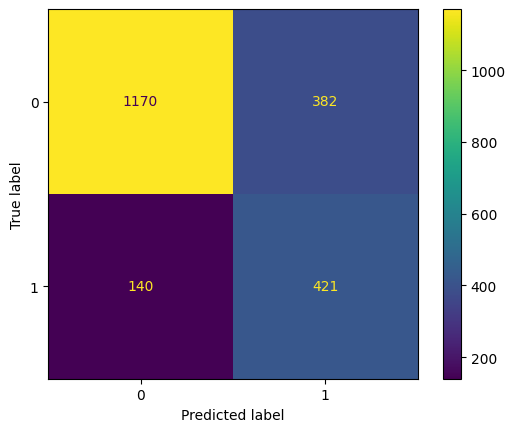

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()

### Modelo XGBoost

In [ ]:
# Pipeline com SMOTEENN, Tomek Links e XGBoost
pipeline_xgb = Pipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('tomek', TomekLinks()),
    ('select', SelectFromModel(XGBClassifier(random_state=42, eval_metric='logloss'))),
    ('xgb', XGBClassifier(random_state=42, eval_metric='logloss'))
])

In [ ]:
# Grade de hiperparâmetros para ajuste
param_grid_xgb = {
    'select__threshold': ['mean', 'median', 0.01],
    'xgb__n_estimators': [100, 200, 300, 400, 500],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__subsample': [0.8, 1],
    'xgb__colsample_bytree': [0.8, 1],
    'xgb__scale_pos_weight': [1, 3, 5]
}

In [ ]:
# GridSearchCV com validação cruzada
grid_xgb = GridSearchCV(
    pipeline_xgb,
    param_grid_xgb,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [ ]:
# Treinando com dados de treino
grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smoteenn', SMOTEENN(random_state=42)),
                                       ('tomek', TomekLinks()),
                                       ('select',
                                        SelectFromModel(estimator=XGBClassifier(base_score=None,
                                                                                booster=None,
                                                                                callbacks=None,
                                                                                colsample_bylevel=None,
                                                                                colsample_bynode=None,
                                                                                colsample_bytree=None,
                                                                                device=None,
                                                                                early_stopping_rounds=None,
                                                                                enable_categorical=False,
                                                                                eval_metric='loglos...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'select__threshold': ['mean', 'median', 0.01],
                         'xgb__colsample_bytree': [0.8, 1],
                         'xgb__learning_rate': [0.01, 0.1],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [100, 200, 300, 400, 500],
                         'xgb__scale_pos_weight': [1, 3, 5],
                         'xgb__subsample': [0.8, 1]},
             scoring='f1', verbose=2)

In [ ]:
# Resultados
print("Melhores hiperparâmetros:", grid_xgb.best_params_)
print("Melhor score (f1):", grid_xgb.best_score_)

Melhores hiperparâmetros: {'select__threshold': 'median', 'xgb__colsample_bytree': 1, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 500, 'xgb__scale_pos_weight': 1, 'xgb__subsample': 1}
Melhor score (f1): 0.6380453794504751


### Avaliação XGBoost pós balanceamento

In [ ]:
# Predição nos dados de treino
print(classification_report(y_train, grid_xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      3622
           1       0.55      0.78      0.65      1308

    accuracy                           0.77      4930
   macro avg       0.73      0.78      0.74      4930
weighted avg       0.81      0.77      0.78      4930



In [ ]:
# Predição nos dados de teste
y_pred_xgb = grid_xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1552
           1       0.53      0.76      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.77      2113



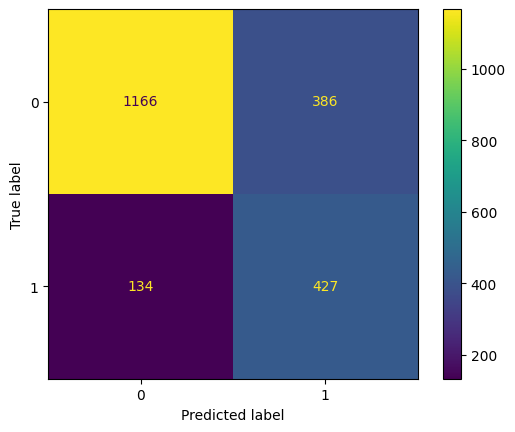

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot()

# 📋 Interpretação e Conclusões

## Análise de Importância das Variáveis

In [ ]:
import matplotlib.pyplot as plt

### Regressão Logística

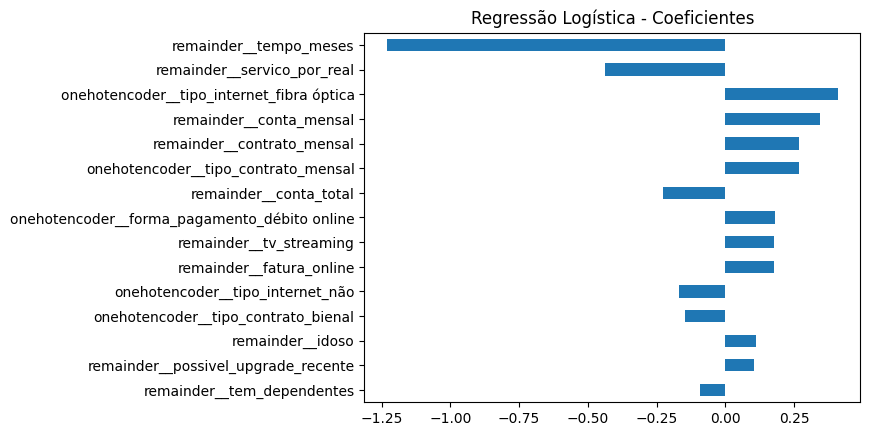

In [ ]:
selected_features_lr = X_train.columns[grid_lr.best_estimator_[-2].get_support()]
coefs = grid_lr.best_estimator_[-1].coef_[0]
coef_df = pd.Series(coefs, index=selected_features_lr).sort_values(key=abs, ascending=False)
coef_df.head(15).plot(kind='barh')
plt.title('Regressão Logística - Coeficientes')
plt.gca().invert_yaxis()
plt.show()

### Random Forest

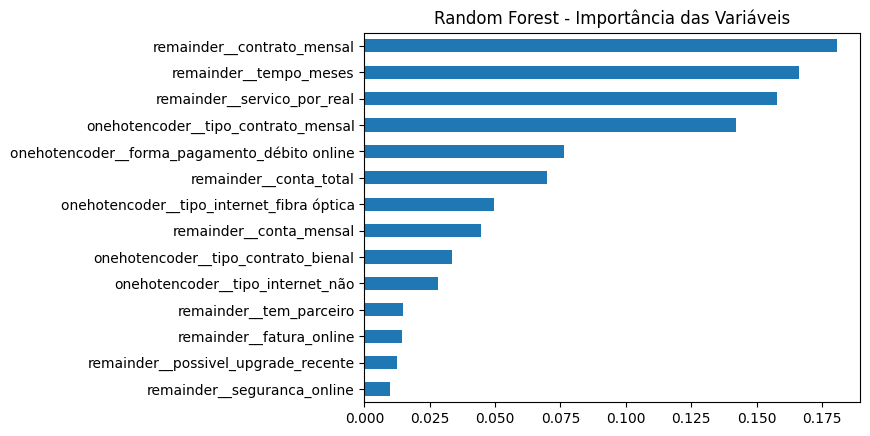

In [ ]:
selected_features_rf = X_train.columns[grid_rf.best_estimator_[-2].get_support()]
importances_rf = grid_rf.best_estimator_[-1].feature_importances_
feat_imp_rf = pd.Series(importances_rf, index=selected_features_rf).sort_values(ascending=False)
feat_imp_rf.head(15).plot(kind='barh')
plt.title('Random Forest - Importância das Variáveis')
plt.gca().invert_yaxis()
plt.show()

### XGBoost

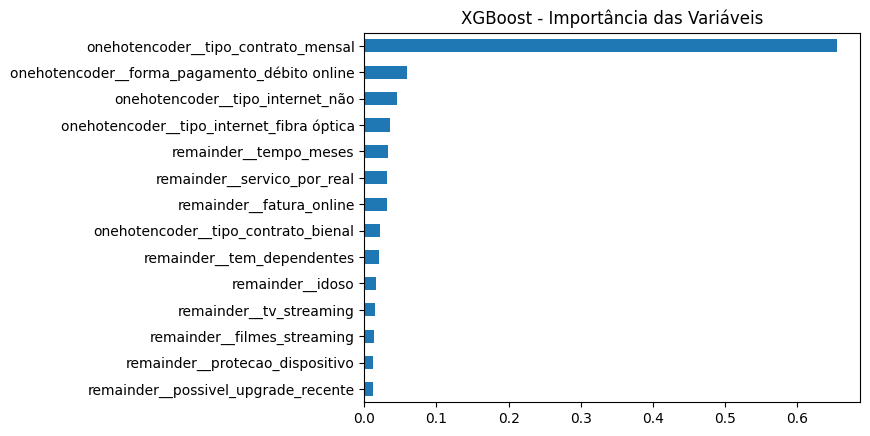

In [ ]:
selected_features_xgb = X_train.columns[grid_xgb.best_estimator_[-2].get_support()]
importances_xgb = grid_xgb.best_estimator_[-1].feature_importances_
feat_imp_xgb = pd.Series(importances_xgb, index=selected_features_xgb).sort_values(ascending=False)
feat_imp_xgb.head(15).plot(kind='barh')
plt.title('XGBoost - Importância das Variáveis')
plt.gca().invert_yaxis()
plt.show()

# 📑 Relatório Final - Análise de Evasão de Clientes (Churn) - Telecom X

## 🧭 Introdução

A evasão de clientes (churn) representa um desafio significativo para empresas de telecomunicação. Este projeto buscou identificar os principais fatores associados à evasão e propor estratégias de retenção baseadas em análise exploratória, engenharia de variáveis e modelagem preditiva.

---

## 📥 Extração e Estrutura Inicial dos Dados

- **Fonte:** Base Telecom X (7043 clientes, 23 variáveis)
- **Variável-alvo:** `evadiu` (0 = cliente ativo, 1 = evadiu)
- **Tipos de variáveis:** Numéricas e categóricas

---

## 🧹 Limpeza e Transformação dos Dados

- **Normalização:**  
    - Codificação de variáveis categóricas (One-Hot/Dummy)
    - Padronização das numéricas
- **Dados Faltantes:**  
    - Nenhum valor ausente identificado
- **Correções:**  
    - Ajuste de tipos e categorias inconsistentes

---

## ⚙️ Criação de Novas Variáveis (Feature Engineering)

- `possivel_upgrade_recente`: Conta mensal > média + tempo_meses < 6
- `contrato_mensal`: Contrato do tipo mensal (dummy)
- `servico_por_real`: Razão de serviços contratados pelo valor da conta mensal
- **Remoção de variáveis com multicolinearidade:**  
    - `conta_total`, `conta_diaria`, `qtd_servicos`

---

## 📊 Análise Descritiva

- **Proporção de churn:** Aproximadamente 26%
- **Tempo de contrato:** Clientes que evadem tendem a permanecer menos de 1 ano
- **Perfil:** Contratos mensais predominam entre os que evadem

---

## 📈 Distribuição da Evasão

- **Contrato mensal e pagamentos digitais**: maiores taxas de churn
- **Múltiplos serviços e maior tempo de empresa**: menores taxas de churn

---

## 🧩 Análise das Variáveis por Evasão

### Categóricas

- **Principais:**  
    - `tipo_contrato`, `forma_pagamento`, `tipo_internet`, `tv_streaming`, `servico_telefone`
- **Insights:**  
    - Contrato mensal e débito automático → maior churn
    - TV streaming e múltiplos serviços → menor churn

### Numéricas

- **Principais:**  
    - `tempo_meses`, `conta_mensal`, `fatura_online`, `servico_por_real`, `possivel_upgrade_recente`
- **Insights:**  
    - Menor tempo de contrato e conta mensal alta → maior churn

---

## 🔗 Correlação e Seleção de Variáveis

- **Correlação mais forte:**  
    - `contrato_mensal` (0.40), `possivel_upgrade_recente` (0.32)
- **Multicolinearidade:**  
    - Remoção de `conta_total`, `conta_diaria`, `qtd_servicos` (correlação > 0.8)

---

## 🤖 Modelagem Preditiva

- **Modelos:** Regressão Logística, Random Forest, XGBoost
- **Balanceamento:** SMOTEENN + Tomek Links

<br>

#### 📉 Métricas Antes do Balanceamento

| Modelo                | F1-score (classe 1) | Acurácia | Recall (classe 1) |
|-----------------------|---------------------|----------|-------------------|
| Regressão Logística   | 0.58                | 0.80     | 0.53              |
| Random Forest         | 0.56                | 0.79     | 0.51              |
| XGBoost               | 0.56                | 0.78     | 0.52              |

<br>

#### 📈 Métricas Após o Balanceamento

| Modelo                | F1-score (classe 1) | Acurácia | Recall (classe 1) |
|-----------------------|---------------------|----------|-------------------|
| Regressão Logística   | 0.61                | 0.73     | 0.79              |
| Random Forest         | 0.62                | 0.75     | 0.75              |
| XGBoost               | 0.62                | 0.75     | 0.76              |

---

## ⭐ Importância das Variáveis (Feature Importance)

- **As variáveis mais relevantes em todos os modelos:**
    - `tempo_meses`
    - `servico_por_real`
    - `tipo_contrato_mensal`
    - `tipo_internet_fibra óptica`
    - `possivel_upgrade_recente`
    - `conta_mensal`
    - `fatura_online`
    - `forma_pagamento_débito online`

---

## 🕵️ Conclusões & Insights

- **Clientes com contratos mensais, pagamentos digitais e pouco tempo de casa** → maior risco de churn.
- **Clientes que realizaram upgrades recentes** ou contrataram poucos serviços têm maior tendência à evasão.
- **Programas de fidelidade e múltiplos serviços** ajudam a reter clientes.

---

## 🚦 Recomendações Estratégicas

- **Estimular contratos de longo prazo** (anuais/bienais).
- **Oferecer promoções para clientes em upgrades recentes.**
- **Programas de fidelização** para clientes multi-serviços.
- **Ações proativas para clientes em risco:** contratos mensais, contas altas, pouco tempo de empresa.
- **Campanhas para ampliar engajamento** com serviços adicionais.

---

